### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 1. Load the dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/AMIT Graduation Project/train.csv')

### 2. Check head and info of the data

In [3]:
df.head(100)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
95,137,accident,Charlotte,9 Mile backup on I-77 South...accident blockin...,1
96,138,accident,"Baton Rouge, LA",Has an accident changed your life? We will hel...,0
97,139,accident,"Hagerstown, MD",#BREAKING: there was a deadly motorcycle car a...,1
98,141,accident,"Gloucestershire , UK",@flowri were you marinading it or was it an ac...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


### 3. Is there a missing data [how many and the percentage if there]?

In [5]:
null_data = df.isnull()

missing_data = {
    "count": null_data.sum(),
    "Percentage": null_data.mean() * 100    # Mean is the summation over the length,
    # "Percentage": (null_data.sum() / len(df)) * 100
}

pd.DataFrame(data=missing_data)

,count,Percentage
id,0,0.000000
keyword,61,0.801261
location,2533,33.272035
text,0,0.000000
target,0,0.000000


### 4. How many data in each class?

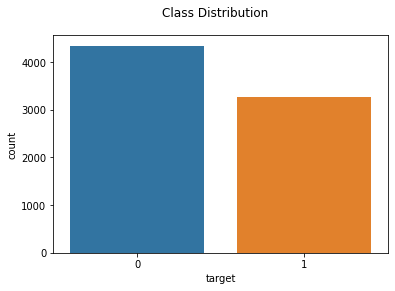

In [6]:
# This function in Seaborn library is to plot the count of a specific colomn in df

sns.countplot(x='target', data=df)

plt.suptitle('Class Distribution')
plt.show()

### 5. Get the top 15 locations of the data

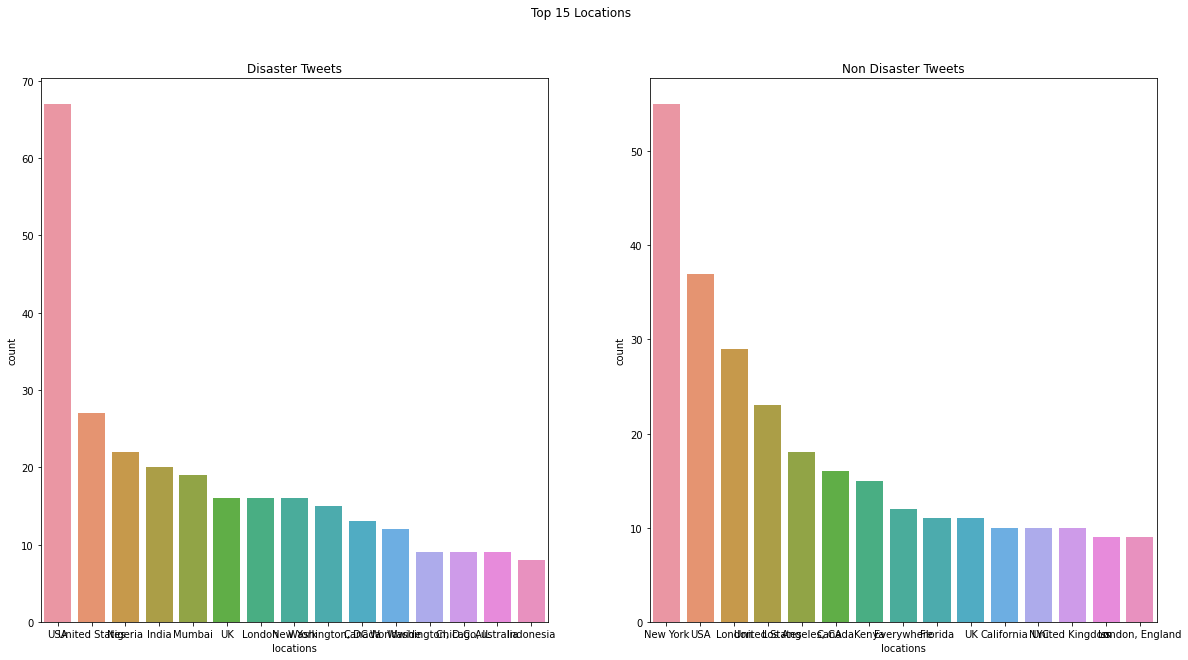

In [41]:
disaster_count = df[df['target']==1]['location'].value_counts()[:15]
none_disaster_count = df[df['target']==0]['location'].value_counts()[:15]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,10))

sns.barplot(y=disaster_count.values, x=disaster_count.index, ax=ax[0])
ax[0].set(ylabel='count', xlabel='locations', title='Disaster Tweets')

sns.barplot(y=none_disaster_count.values, x=none_disaster_count.index, ax=ax[1])
ax[1].set(ylabel='count', xlabel='locations', title='Non Disaster Tweets')

plt.suptitle('Top 15 Locations')
plt.show()

### 6. Get the top 15 keyword in the data

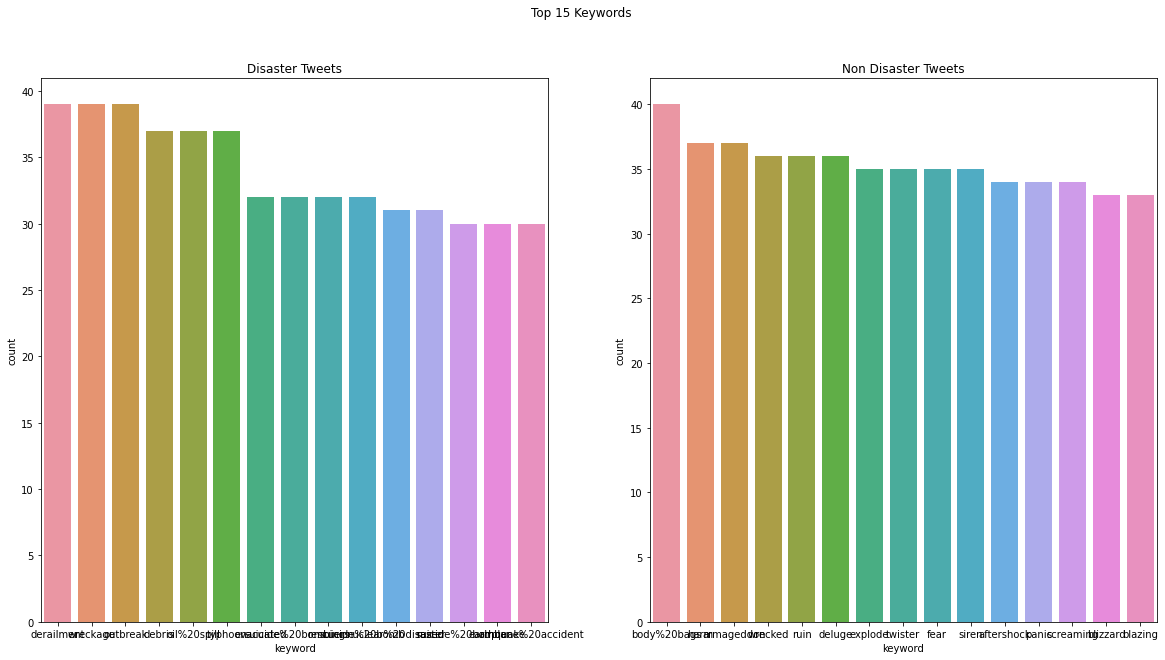

In [39]:
disaster_count = df[df['target']==1]['keyword'].value_counts()[:15]
none_disaster_count = df[df['target']==0]['keyword'].value_counts()[:15]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,10))

sns.barplot(y=disaster_count.values, x=disaster_count.index, ax=ax[0])
ax[0].set(ylabel='count', xlabel="keyword", title='Disaster Tweets')

sns.barplot(y=none_disaster_count.values, x=none_disaster_count.index, ax=ax[1])
ax[1].set(ylabel='count', xlabel='keyword', title='Non Disaster Tweets')

plt.suptitle('Top 15 Keywords')
plt.show()

### 7. What are the most common words?

In [12]:
def build_corpus(target_column_name, text_column_name, val):
    corpus = []
    for text in df[df[target_column_name]==val][text_column_name].str.split():
        for subtext in text:
            corpus.append(subtext)
    return corpus

corpus_disaster = build_corpus("target", "text", 1)
corpus_nondisaster = build_corpus("target", "text", 0)

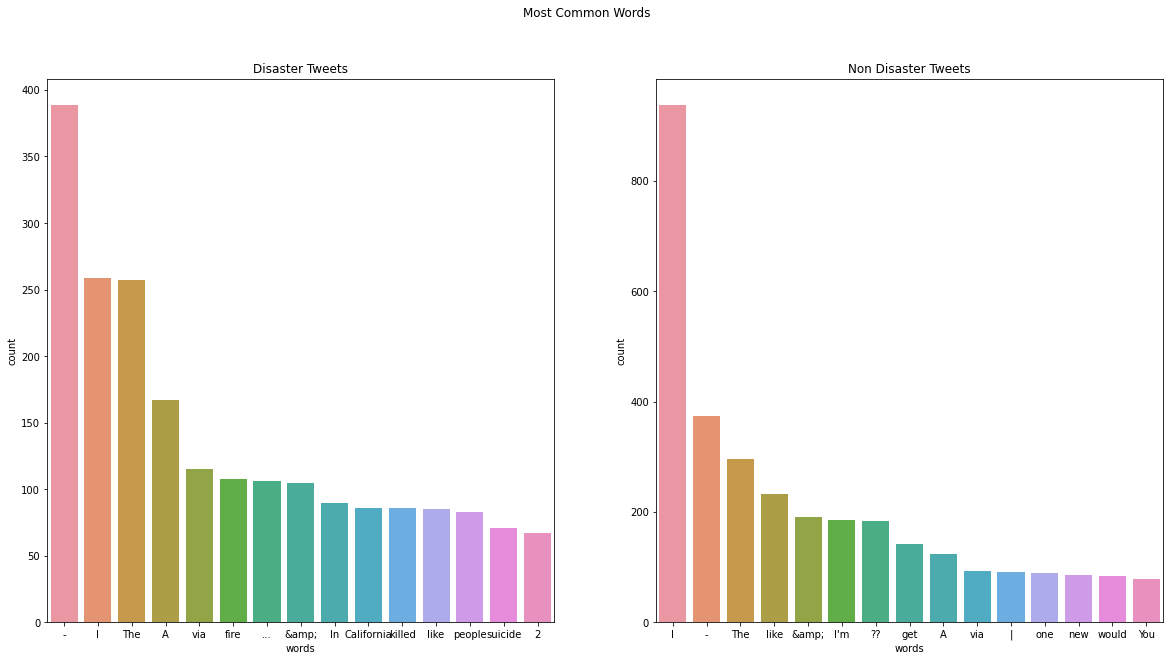

In [38]:
stop_words = stopwords.words('english')

def get_most_common_words(corpus, stop_word):
    common_words = []
    for word in corpus:
        if word not in stop_word:
            common_words.append(word)
    return common_words

common_words_disaster = get_most_common_words(corpus_disaster, stop_words)
common_words_nondisaster = get_most_common_words(corpus_nondisaster, stop_words)
        
counter_disaster = Counter(common_words_disaster)
counter_nondisaster = Counter(common_words_nondisaster)

word_disaster, word_count_disaster = map(list, zip(*counter_disaster.most_common()[:15]))
word_nondisaster, word_count_nondisaster = map(list, zip(*counter_nondisaster.most_common()[:15]))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

sns.barplot(y=word_count_disaster, x=word_disaster, ax=ax[0])
ax[0].set(ylabel='count', xlabel='words', title='Disaster Tweets')

sns.barplot(y=word_count_nondisaster, x=word_nondisaster, ax=ax[1])
ax[1].set(ylabel='count', xlabel='words', title='Non Disaster Tweets')

fig.suptitle('Most Common Words')
plt.show()

### 8. What are the most common stop words?

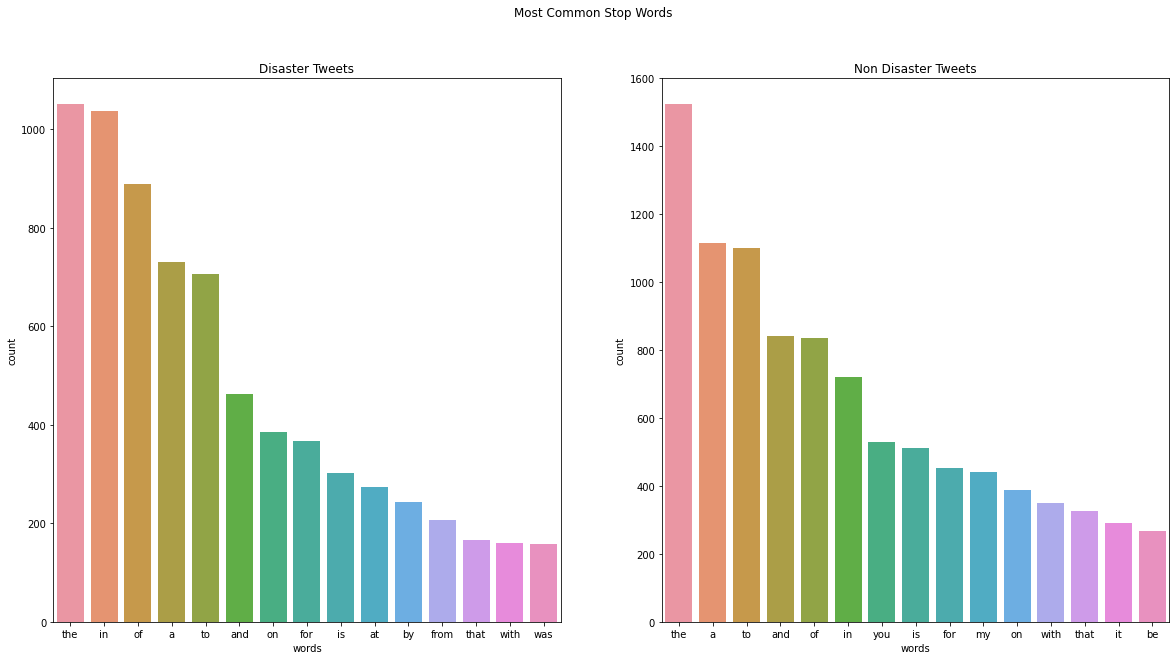

In [15]:
stop_words = stopwords.words('english')

def get_most_common_stop_words(corpus, stop_word):
    common_words = []
    for word in corpus:
        if word in stop_word:
            common_words.append(word)
    return common_words

common_words_disaster = get_most_common_stop_words(corpus_disaster, stop_words)
common_words_nondisaster = get_most_common_stop_words(corpus_nondisaster, stop_words)
        
counter_disaster = Counter(common_words_disaster)
counter_nondisaster = Counter(common_words_nondisaster)

word_disaster, word_count_disaster = map(list, zip(*counter_disaster.most_common()[:15]))
word_nondisaster, word_count_nondisaster = map(list, zip(*counter_nondisaster.most_common()[:15]))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

sns.barplot(y=word_count_disaster, x=word_disaster, ax=ax[0])
ax[0].set(ylabel='count', xlabel='words', title='Disaster Tweets')

sns.barplot(y=word_count_nondisaster, x=word_nondisaster, ax=ax[1])
ax[1].set(ylabel='count', xlabel='words', title='Non Disaster Tweets')

fig.suptitle('Most Common Stop Words')
plt.show()

### 9. Use nlp to prepare dataset [tokenization, pad sequence, etc.]

In [30]:
x_train = pd.read_csv('/content/drive/MyDrive/AMIT Graduation Project/train.csv', usecols=["id", "text", "target"])
x_test = pd.read_csv('/content/drive/MyDrive/AMIT Graduation Project/test.csv', usecols=["id", "text"])

y_train = x_train['target'].values

In [31]:
text_train = x_train.text.values
text_test = x_test.text.values
print(text_train[:10])

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'
 'Forest fire near La Ronge Sask. Canada'
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"
 '13,000 people receive #wildfires evacuation orders in California '
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school '
 '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires'
 '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas'
 "I'm on top of the hill and I can see a fire in the woods..."
 "There's an emergency evacuation happening now in the building across the street"
 "I'm afraid that the tornado is coming to our area..."]


In [32]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(text_train)

X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)

In [33]:
X_train = keras.preprocessing.sequence.pad_sequences(X_train)
X_test = keras.preprocessing.sequence.pad_sequences(X_test)

print(X_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0  119 4633   24    4  868    8   21  263
  138 1619 4634   89   40]


In [34]:
vocab_size = len(tokenizer.word_index)
print('Vocabulary Size:', vocab_size)

Vocabulary Size: 22700


### 10. Prepare train, test sets

In [35]:
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### 11. Train your LSTM structure

In [37]:
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = 128))
model.add(LSTM(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation='relu'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2905600   
                                                                 
 lstm_3 (LSTM)               (None, 256)               394240    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 3,341,057
Trainable params: 3,341,057
Non-trainable params: 0
_________________________________________________________________


In [24]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), shuffle=True, epochs=25, batch_size=1024, callbacks=[early_stopping])

Epoch 1/25
6/6 [==============================] - 3s 111ms/step - loss: 3.2604 - accuracy: 0.5695 - val_loss: 1.1200 - val_accuracy: 0.5739
Epoch 2/25
6/6 [==============================] - 0s 60ms/step - loss: 0.8945 - accuracy: 0.5601 - val_loss: 0.8693 - val_accuracy: 0.4281
Epoch 3/25
6/6 [==============================] - 0s 60ms/step - loss: 0.6971 - accuracy: 0.5461 - val_loss: 0.6707 - val_accuracy: 0.5739
Epoch 4/25
6/6 [==============================] - 0s 58ms/step - loss: 0.6371 - accuracy: 0.5727 - val_loss: 0.6336 - val_accuracy: 0.6113
Epoch 5/25
6/6 [==============================] - 0s 58ms/step - loss: 0.5684 - accuracy: 0.7722 - val_loss: 0.6078 - val_accuracy: 0.6724
Epoch 6/25
6/6 [==============================] - 0s 58ms/step - loss: 0.4932 - accuracy: 0.7665 - val_loss: 0.5773 - val_accuracy: 0.6894
Epoch 7/25
6/6 [==============================] - 0s 59ms/step - loss: 0.3955 - accuracy: 0.8560 - val_loss: 0.5242 - val_accuracy: 0.7452
Epoch 8/25
6/6 [==========

### 12. Evaluate the model and make predictions

In [25]:
train_score = model.evaluate(x_val, y_val)

48/48 [==============================] - 0s 6ms/step - loss: 1.8639 - accuracy: 0.7663


In [26]:
preds = model.predict(X_test).flatten()
preds

array([0.5169596 , 0.77812403, 1.6287477 , ..., 0.80976707, 0.24183017,
       1.4006257 ], dtype=float32)

In [27]:
results = {'text':twitts_test, 'target':preds.astype('int32'), "prob": preds}
df_results = pd.DataFrame(results)
df_results

,text,target,prob
0,Just happened a terrible car crash,0,0.516960
1,"Heard about #earthquake is different cities, s...",0,0.778124
2,"there is a forest fire at spot pond, geese are...",1,1.628748
3,Apocalypse lighting. #Spokane #wildfires,0,0.852775
4,Typhoon Soudelor kills 28 in China and Taiwan,3,3.253845
...,...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,1,1.279213
3259,Storm in RI worse than last hurricane. My city...,2,2.064404
3260,Green Line derailment in Chicago http://t.co/U...,0,0.809767
3261,MEG issues Hazardous Weather Outlook (HWO) htt...,0,0.241830


### 13. Evaluate the results with charts of acc and loss

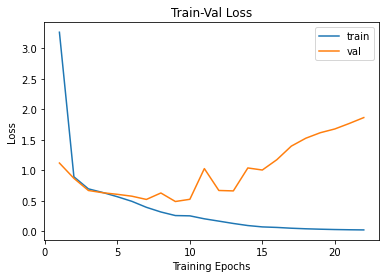

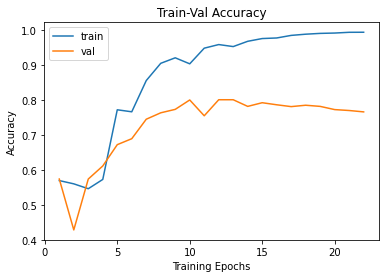

In [28]:
def plot_history(loss_hist, metric_hist):
    num_epochs= len(loss_hist["train"])

    plt.title("Train-Val Loss")
    plt.plot(range(1,num_epochs+1), loss_hist["train"], label="train")
    plt.plot(range(1,num_epochs+1), loss_hist["val"], label="val")
    plt.ylabel("Loss")
    plt.xlabel("Training Epochs")
    plt.legend()
    plt.show()

    plt.title("Train-Val Accuracy")
    plt.plot(range(1,num_epochs+1), metric_hist["train"],label="train")
    plt.plot(range(1,num_epochs+1), metric_hist["val"],label="val")
    plt.ylabel("Accuracy")
    plt.xlabel("Training Epochs")
    plt.legend()
    plt.show()

loss_hist = {
    "train": history.history['loss'],
    "val": history.history['val_loss'],
}

metric_hist = {
    "train": history.history["accuracy"],
    "val": history.history["val_accuracy"]
}

plot_history(loss_hist, metric_hist)

### 14. Save your model

In [29]:
model.save("/content/drive/MyDrive/AMIT Graduation Project/model.h5")